In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pykitti
import torch
import pypose as pp
# Set default tensor type to float64
torch.set_default_dtype(torch.float64)

data_wenshan = '/home/data2/kitti/00/pose_left.txt'
# data_wenshan ='/home/shaoshus/tartanvo/pypose_tartanvo/data/KITTI_10/pose_left.txt'

pose_wenshan = np.genfromtxt(data_wenshan, delimiter=' ',dtype=np.float64)
print(pose_wenshan.shape)

# data_path = '/home/data2/euroc_raw/MH_01_easy/mav0/imu0/data.csv'

pose_imu = np.genfromtxt("test_array_kitti_ori_0034_10.csv", delimiter=',',dtype=np.float64)

pose_imu = np.genfromtxt(data_path, delimiter=',',dtype=np.float64)

print(pose_imu.shape)


(4541, 7)
(36820, 7)


In [2]:
basedir = '/home/data2/kitti_raw'
date = '2011_09_30'
drive = '0034'

dataset = pykitti.raw(basedir, date, drive)
T_LI = dataset.calib.T_cam2_imu
T_CAM_IMU = pp.from_matrix(torch.tensor(T_LI), ltype=pp.SE3_type).to(dtype=torch.float64)
T_IMU_CAM = T_CAM_IMU.Inv() 

In [1]:
# import matplotlib
# matplotlib.use('WebAgg')
import pypose as pp

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the rotation matrix (e.g., using Euler angles)
def rotation_matrix(roll, pitch, yaw):
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])

    R_y = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])

    R_z = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])

    R = np.dot(R_z, np.dot(R_y, R_x))
    return R


def plot_trajctory(pose, arr_length=0.8, trajectory_length=3,title = '',feq = 2,plot_3d_pose = True,limit = 10.0,
                   create_new_figure=True,fig=None):
    # Plot the 3D pose
    if create_new_figure:
        fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
        # Define the 3D pose (translation and rotation)
    # arr_length = 0.8
    for i in range(0,trajectory_length,feq):
        if plot_3d_pose:
            R = pp.SO3(pose[i,3:]).matrix().numpy()
            translation = pose[i,:3]

            x_axis = np.dot(R, np.array([1, 0, 0]))
            y_axis = np.dot(R, np.array([0, 1, 0]))
            z_axis = np.dot(R, np.array([0, 0, 1]))


            ax.quiver(*translation, *x_axis, color='r', label='X-axis' , length=arr_length)
            ax.quiver(*translation, *y_axis, color='g', label='Y-axis' , length=arr_length)
            ax.quiver(*translation, *z_axis, color='b', label='Z-axis' , length=arr_length)
            # ax.quiver(*(np.array([0, 0, 0])), *translation, color='k', label='Origin' , length=1)
            ax.text(*translation, str(i), color='k')

        else:
            try:
                pose = pose.numpy()
            except:
                pass
            ax.plot(pose[:trajectory_length,0], pose[:trajectory_length,1], pose[:trajectory_length,2], color='k', label='Trajectory')
    
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # title
    ax.set_title(title)


T_C1C2 = np.array([ 0., 1.,0.,0.,
                    0., 0.,1.,0.,
                    1., 0.,0.,0.,
                    0., 0.,0.,1.]).reshape(4,4)

T_C1C2 = pp.from_matrix(T_C1C2, ltype=pp.SE3_type)
T_C1C2 = np.array([ 0., 1.,0.,0.,
                    0., 0.,1.,0.,
                    1., 0.,0.,0.,
                    0., 0.,0.,1.]).reshape(4,4)

T_C1C2 = pp.from_matrix(T_C1C2, ltype=pp.SE3_type)

In [51]:
import numpy as np
gt_traj = np.load('gt_traj.npy')
est_traj = np.load('est_traj.npy')
print(gt_traj.shape)
print(est_traj.shape)

length = gt_traj.shape[0]
limit = 200

plt.close('all')
# fig = plt.figure(figsize=(8, 8))
plot_trajctory(gt_traj, arr_length=0.8, trajectory_length=length,title = 'gt_traj',
               plot_3d_pose = False,limit = limit,create_new_figure=True,fig = fig)
plot_trajctory(est_traj, arr_length=0.8, trajectory_length=length,title = 'est_traj',
               plot_3d_pose = False,limit = limit,create_new_figure=True,fig = fig)
plt.show()


(1105, 7)
(1105, 7)


1.08406125004394
0.9224571028246488
1.5035704943481223

92.51715453166014
5.272527738142505


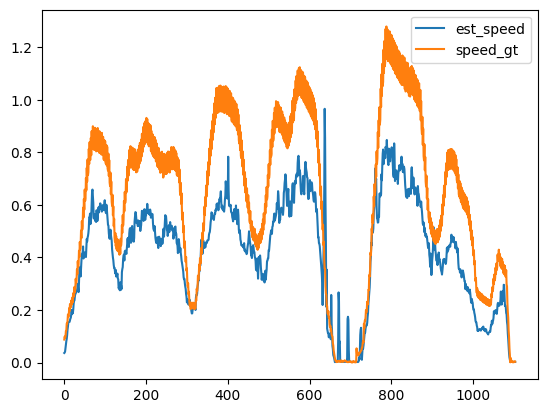

In [17]:
est_speed = np.load('est_speed.npy')
speed_gt = np.load('speed_gt.npy')
# print(est_speed.shape)
# print(speed_gt.shape)
plt.plot(est_speed, label='est_speed')
plt.plot(speed_gt, label='speed_gt')
mask = (est_speed>0.01)
# plt.plot(speed_gt[mask]/est_speed[mask])
# plt.plot(est_speed[mask]/speed_gt[mask])

scale1 = est_speed[mask]/speed_gt[mask]
# scale1 = 1.0/scale1
scale2 = speed_gt[mask]/est_speed[mask]

print(scale1.mean())
print(1.0/scale1.mean())
print(scale2.mean())
print()
print(scale1.max())
print(scale2.max())

plt.legend()
plt.show()

In [33]:
speed_gt.min()

0.0006312401988505563

In [42]:
est_speed = np.load('est_speed.npy')
speed_gt = np.load('speed_gt.npy')
# print(est_speed.shape)
# print(speed_gt.shape)
# plt.plot(est_speed, label='est_speed')
plt.plot(speed_gt, label='speed_gt')
mask = (speed_gt>0.001)
# plt.plot(speed_gt[mask]/est_speed[mask])
# plt.plot(est_speed[mask]/speed_gt[mask])

scale1 = est_speed[mask]/speed_gt[mask]
scale2 = speed_gt[mask]/est_speed[mask]

print(scale1.mean())
print(scale2.mean())
print()
print(scale1.max())
print(scale2.max())

plt.legend()
plt.show()

1.0705445007210932
1.5740310170698535

92.51715453166014
18.27688128667901


In [29]:
scale1 = est_speed/speed_gt
scale2 = speed_gt/est_speed
print(scale1.mean())
print(scale2.mean())

1.0763123320437624
1.5716101877027964


/home/shaoshus/anaconda3/envs/pypose/lib/python3.8/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <slot wrapper '__getitem__' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \
/home/shaoshus/anaconda3/envs/pypose/lib/python3.8/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <method 'unbind' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \


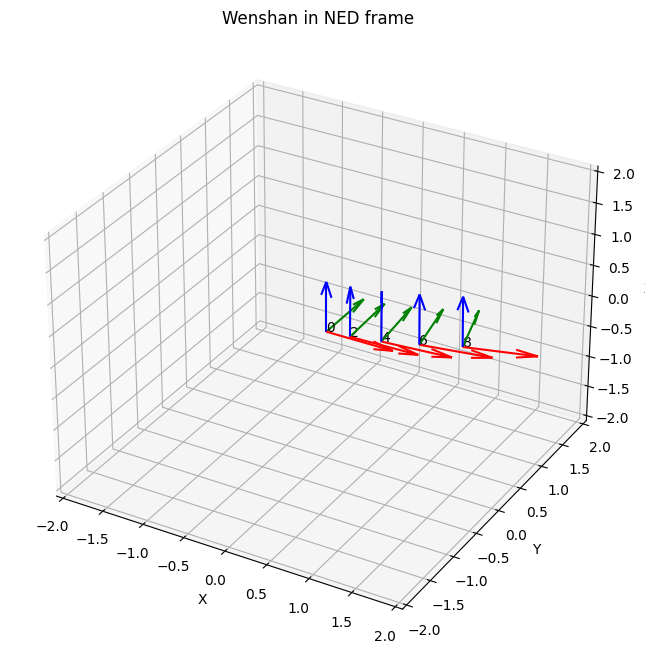

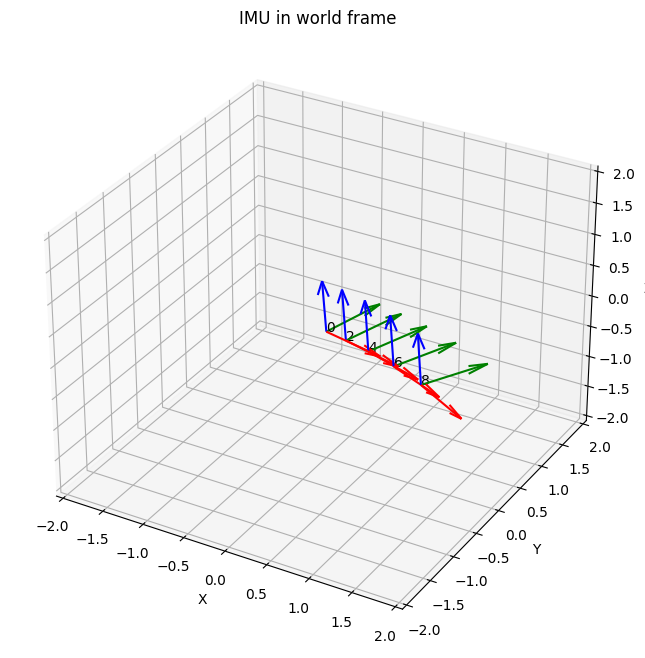

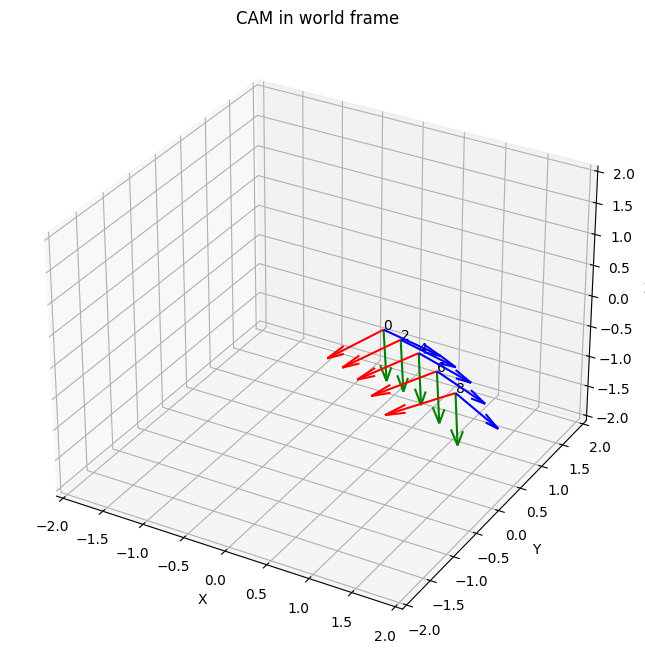

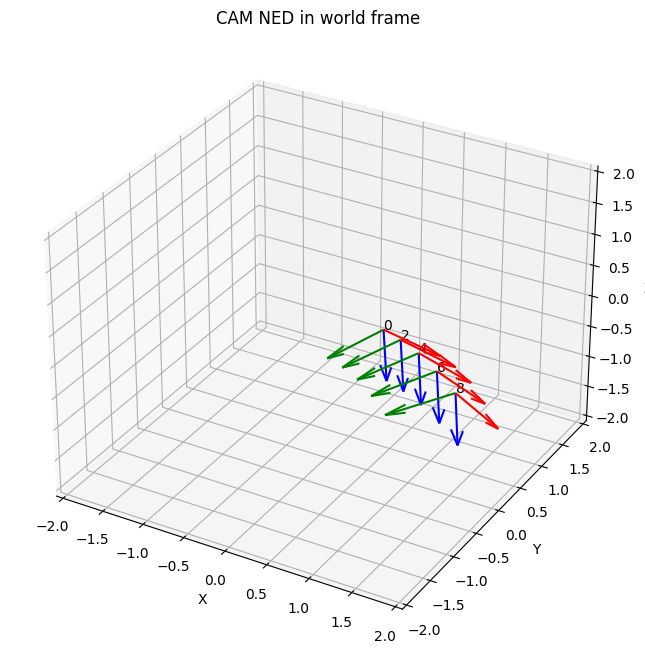

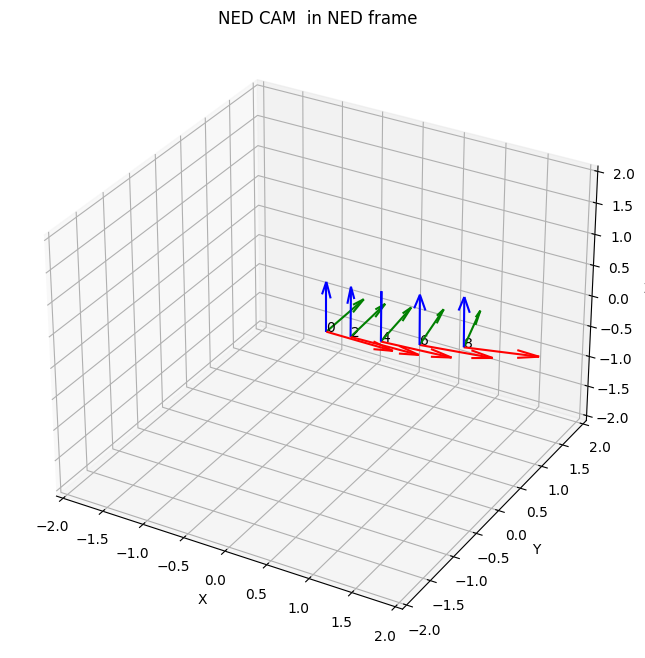

In [4]:
# close all plot
plt.close('all')

length = 10

plot_trajctory(pose_wenshan, arr_length=0.8, trajectory_length=length,title = 'Wenshan in NED frame')
plot_trajctory(pose_imu, arr_length=0.8, trajectory_length=length,title = 'IMU in world frame')
pose_cam =  pp.SE3(pose_imu) * T_IMU_CAM
plot_trajctory(pose_cam, arr_length=0.8, trajectory_length=length,title = 'CAM in world frame')
pose_cam_ned = pose_cam * T_C1C2
plot_trajctory(pose_cam_ned, arr_length=0.8, trajectory_length=length,title = 'CAM NED in world frame')

ned_pose_cam_ned =  pose_cam_ned[0,:].Inv() * pose_cam_ned
 
# ned_pose_cam_ned =   pose_cam_ned * pose_cam_ned[0,:].Inv()

# ned_pose_cam_ned = T_NED_NEU *  T * pp.SE3(pose[i])  * T_NED_CAM

plot_trajctory(ned_pose_cam_ned, arr_length=0.8, trajectory_length=length,title = 'NED CAM  in NED frame')
# plt.show()


# Euroc

In [99]:
# data_wenshan = '/home/data2/kitti/00/pose_left.txt'
# data_wenshan ='/home/shaoshus/tartanvo/pypose_tartanvo/data/EuRoC_V102/pose_left.txt'

data_wenshan ='/home/data2/euroc/MH_01/cam0/pose_left.txt' 
# data_wenshan ='/home/data2/euroc/MH_02/cam0/pose_left.txt'

pose_wenshan = np.genfromtxt(data_wenshan, delimiter=' ',dtype=np.float64)
print(pose_wenshan.shape)
pose_wenshan = pp.SE3(pose_wenshan)

pose_wenshan = pose_wenshan[0,:].Inv() * pose_wenshan

imu_data = "test_array_euroc_MH_01_easy.csv"
# imu_data = "test_array_euroc_ori_MH_02_easy.csv"

pose_imu = np.genfromtxt(imu_data, delimiter=',',dtype=np.float64)

print(pose_imu.shape)

(3646, 7)
(3638, 7)


In [100]:
plt.close('all')
end = 1000
plt.plot(pose_wenshan[:end,0],pose_wenshan[:end,1],label='wenshan')
plt.plot(pose_imu[:end,0],pose_imu[:end,1],label='imu')
plt.show()

/home/shaoshus/anaconda3/envs/pypose/lib/python3.8/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <slot wrapper '__getitem__' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \
/home/shaoshus/anaconda3/envs/pypose/lib/python3.8/site-packages/pypose/lietensor/lietensor.py:918: UserWarning: Tensor Shape Invalid by calling <method 'unbind' of 'torch._C._TensorBase' objects>, go to https://pypose.org/docs/main/generated/pypose.LieTensor
  warnings.warn('Tensor Shape Invalid by calling {}, ' \


In [83]:
# # ======= Transform the GT into cam NED frame =======
# from evaluator.transformation import motion_ses2pose_quats, pose_quats2motion_ses, line2mat, ses2SEs, motion2pose, quat2SE, SE2quat, SEs2quats
# from evaluator.transformation import quat2SE,  SEs2quats

import matplotlib.pyplot as plt

# # datadir = '/prague/tartanvo_data/euroc/MH_04_difficult_mav0_Undistorted/cam0'
# datadir = '/prague/tartanvo_data/euroc/V1_02_medium_mav0_Undistorted/cam0'
import numpy as np
import pypose as pp
import torch


T_IMU_CAM = np.array([0.0148655429818, -0.999880929698, 0.00414029679422, -0.0216401454975,
                     0.999557249008, 0.0149672133247, 0.025715529948, -0.064676986768,
                    -0.0257744366974, 0.00375618835797, 0.999660727178, 0.00981073058949,
                     0.0, 0.0, 0.0, 1.0]).reshape(4,4) # extrinsics

T_IMU_CAM = pp.from_matrix(T_IMU_CAM, ltype=pp.SE3_type)

T_C1C2 = np.array([ 0., 1.,0.,0.,
                    0., 0.,1.,0.,
                    1., 0.,0.,0.,
                    0., 0.,0.,1.]).reshape(4,4)

T_C1C2 = pp.from_matrix(T_C1C2, ltype=pp.SE3_type)
# T_C1C2_pp * T_IMU_CAM_pp

In [80]:
import os

# path = "/home/data2/euroc_raw/MH_01_easy/mav0"
path = "/home/data2/euroc_raw/MH_02_easy/mav0"
dirname = os.path.dirname(path)
basename = os.path.basename(dirname)

print(basename)

MH_02_easy


In [77]:
pose_wenshan.shape

(3646, 7)

In [85]:
# close all plot
plt.close('all')

length = 400
feq = 100

arr_size = 0.5

pose_wenshan = np.genfromtxt(data_wenshan, delimiter=' ',dtype=np.float64)
print(pose_wenshan.shape)
pose_wenshan = pp.SE3(pose_wenshan)

pose_wenshan = pose_wenshan[0,:].Inv() * pose_wenshan
plot_trajctory(pose_wenshan, arr_length=arr_size, trajectory_length=length,title = 'Wenshan in NED frame',feq = feq)

plot_trajctory(pose_imu, arr_length=arr_size, trajectory_length=length,title = 'IMU in world frame',feq = feq)
pose_cam =  pp.SE3(pose_imu) * T_IMU_CAM
plot_trajctory(pose_cam, arr_length=arr_size, trajectory_length=length,title = 'CAM in world frame',feq = feq)
pose_cam_ned = pose_cam * T_C1C2
plot_trajctory(pose_cam_ned, arr_length=arr_size, trajectory_length=length,title = 'CAM NED in world frame',feq = feq)

ned_pose_cam_ned =  pose_cam_ned[0,:].Inv() * pose_cam_ned
 
# ned_pose_cam_ned =   pose_cam_ned * pose_cam_ned[0,:].Inv()

# ned_pose_cam_ned = T_NED_NEU *  T * pp.SE3(pose[i])  * T_NED_CAM

plot_trajctory(ned_pose_cam_ned, arr_length=arr_size, trajectory_length=length,title = 'NED CAM  in NED frame',feq = feq)
plt.show()


(3006, 7)


In [ ]:
'tartanair_est.txt'
